# Coffe Sales Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Rahul Singh\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Rahul Singh\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = pd.read_csv("index.csv")
data

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


In [19]:
data.dropna()

,date,datetime,cash_type,card,money,coffee_name,hour,day_of_week,month
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,10,Friday,March
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12,Friday,March
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12,Friday,March
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,13,Friday,March
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,13,Friday,March
...,...,...,...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado,20,Wednesday,July
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk,20,Wednesday,July
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte,21,Wednesday,July
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte,21,Wednesday,July


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [5]:
data.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


In [6]:
data.shape

(1133, 6)

### Changing date time format 

In [7]:
data['date'] = pd.to_datetime(data['date'])
data['datetime'] = pd.to_datetime(data['datetime'])

In [8]:
data['hour'] = data['datetime'].dt.hour
data['day_of_week'] = data['datetime'].dt.day_name()
data['month'] = data['datetime'].dt.month_name()

### Peak Sales hour

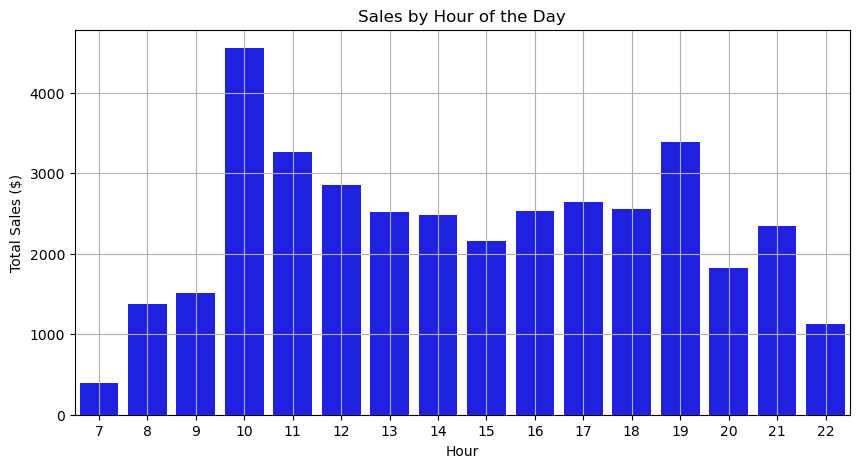

In [10]:
hourly_sales = data.groupby('hour')['money'].sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_sales.index, y=hourly_sales.values, color="blue")
plt.title("Sales by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Total Sales ($)")
plt.grid()
plt.show()

### Payment Method Analysis

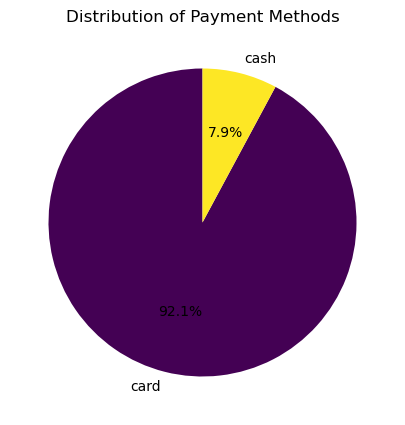

In [11]:
payment_counts = data['cash_type'].value_counts()

plt.figure(figsize=(8, 5))
payment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap="viridis")
plt.title("Distribution of Payment Methods")
plt.ylabel("")
plt.show()

### Coffee Type Popularity 

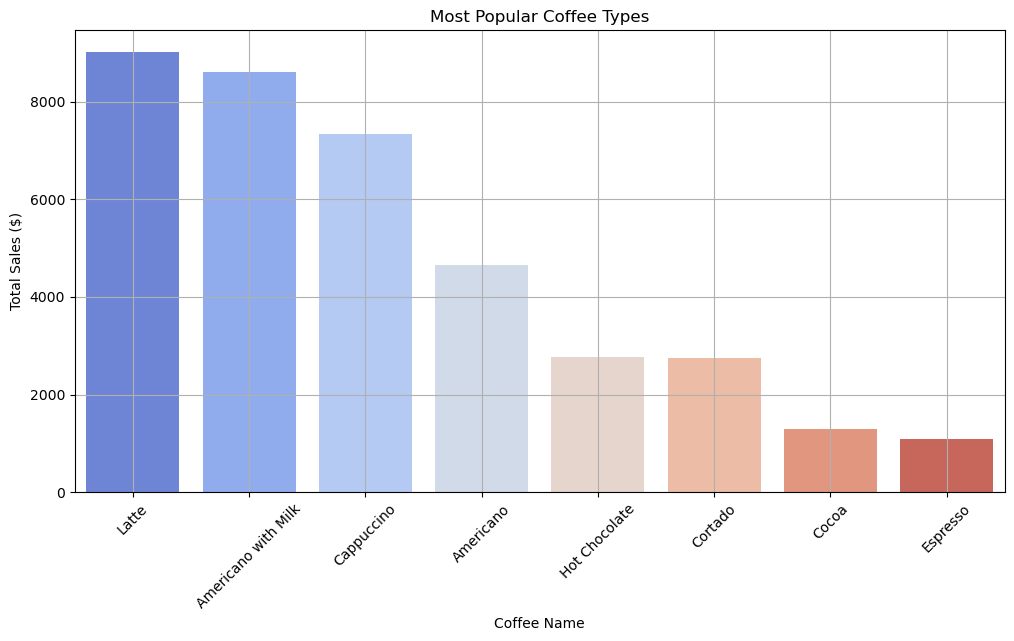

In [12]:
coffee_sales = data.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=coffee_sales.index, y=coffee_sales.values, palette="coolwarm")
plt.title("Most Popular Coffee Types")
plt.xlabel("Coffee Name")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Average Spending Per Transaction

In [13]:
average_spending = data['money'].mean()
max_spending = data['money'].max()
min_spending = data['money'].min()

print(f"Average Transaction Value: ${average_spending:.2f}")
print(f"Highest Transaction: ${max_spending:.2f}")
print(f"Lowest Transaction: ${min_spending:.2f}")

Average Transaction Value: $33.11
Highest Transaction: $40.00
Lowest Transaction: $18.12


### Sales by Day of the Week

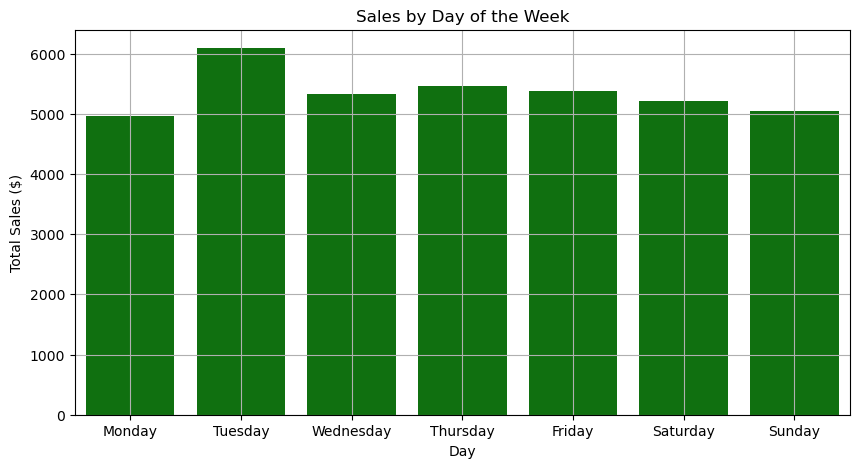

In [14]:
weekly_sales = data.groupby('day_of_week')['money'].sum()
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_sales = weekly_sales.reindex(ordered_days)  # Ensure correct order

plt.figure(figsize=(10, 5))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, color="green")
plt.title("Sales by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Total Sales ($)")
plt.grid()
plt.show()

### Average spending per Transaction

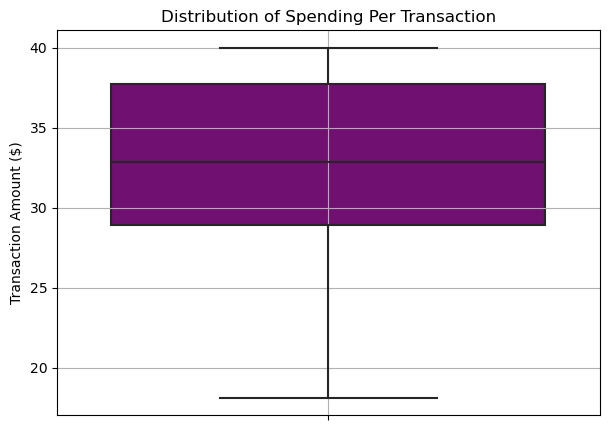

In [16]:
plt.figure(figsize=(7, 5))
sns.boxplot(y=data['money'], color='purple')
plt.title("Distribution of Spending Per Transaction")
plt.ylabel("Transaction Amount ($)")
plt.grid()
plt.show()

# Conclusion

# **Insights from the Coffee Sales Analysis** ☕📊  
    

## **1. Peak Sales Hours** ⏰  
- A **bar chart** illustrates total coffee sales per hour of the day.  
- Helps businesses determine **busiest hours** and **off-peak times**.   

## **2. Payment Method Analysis** 💳💵  
- A **pie chart** displays the distribution of cash vs. card transactions.  
- This helps understand customer **payment preferences**.  
- Businesses can decide whether to **promote digital payments** or **offer discounts for cash transactions**.  

## **3. Coffee Type Popularity** ☕🔥  
- A **bar chart** showcases the most and least popular coffee types.   

## **4. Average Spending Per Transaction** 💰  
- The analysis calculates:  
  - **Average transaction value**  
  - **Highest and lowest transaction amounts**  
- This helps businesses **set pricing strategies** and identify opportunities to increase **upselling**.  

## **5. Sales by Day of the Week** 📅  
- A **bar chart** highlights which days of the week generate the most sales.  
- Helps optimize **promotions** and **special offers** on slower days.   

## **6. High-Value Transactions** 💲  
- A **histogram** identifies peak hours for **high-value transactions**. 